# HW11-Neural Networks

### Q1. (2 points))—one answer per group

1)	Explain the dataset you are using in your project. <br />
 a)	Why did you choose that dataset? What do you find interesting in it? What are some major concerns that you have about it?<br />
 b)	What are the features and labels? Is it a regression or classification problem?<br />
What relation between variables are you trying to learn? Why do you think those relations are interesting or important?<br />
 c)	What are your a priori hypotheses about the relations that you will find? Why?<br />
 d)	What would you define as success in this project? Explain.<br />


2)	Explain your analysis<br />
a)	What kind of analysis method (machine-learning algorithms) are you using or do you plan to use? Why do you plan to use those methods over others? <br />
b)	What kind of results (in terms of accuracy or AUC ROC) do you anticipate? Why?


(write here)




















### Q2. (4 points)

In the recitation class we went over a neural-networks example. Here we similarly ask that you load the MNIST dataset (also used in the clip we watched in class). Then use the Keras package and train a neural network with 2 hidden layers, 16 neurons each. The input layer is 784 neurons, the flattened image size (assuming all bias terms are automatically added to the network). When the neural network starts running, there are 16 set of weights of size 784 in the first hidden layer. In the second hidden layer, the input size is 16 and the output size is 10. Use softmax in the output layer. All the network’s weights are learned from the training set, made up of samples, using stochastic gradient descent and backpropagation 

a) Extract the weights from the first hidden layer (784x16) and from the second hidden layer (16x16). For each hidden layer, reshape the weights to a two-dimension images (for example, sixteen 28x28 image outputs for the first hidden layer and sixteen 4x4 image outputs for the second hidden layer). Plot the images for each hidden layer.

b) What are the plots of weight images telling you about the neural network? How do you think the neural network is picking up important features from the images, if at all?

c) Do the same thing as in a) for a different, fully connected feed-forward neural-network architecture of your choice (i.e., each neuron in layer i connects to each neuron in layer i+1 and only to those neurons). The network should have at least 2 hidden layers too. Then compare the weight images output for the first two hidden layers. Is there a difference compare to the weight images in (a)? Explain the difference or similarity that exists.


Hint: 

1- **We were able to achieve 96% test accuracy within 20 epochs)**

2- You can extract the weights by running the following code after you extract the weights:

weights = []

for layer in model.layers:

weights.append(layer.get_weights())

In [1]:
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import warnings

Using TensorFlow backend.


## Load Data and Preprocess Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [229]:
x_train = x_train.reshape(-1, 784) #28*28=784
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')

In [119]:
x_train.shape

(60000, 784)

In [236]:
# 128 images in each batch
batch_size = 128
# 0-9 numbered images
num_classes = 10
# train for 20 epochs
epochs = 20

In [231]:
# Scale the data to be between 0 and 1
x_train /= 255.   
x_test /= 255.

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors (one hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, 'y_train')
print(y_test.shape, 'y_test')

60000 train samples
10000 test samples
(60000, 10) y_train
(10000, 10) y_test


## Build and Fit the Model

In [237]:
# start building the model
sgdNN = Sequential()

# add a fully connected hidden layer
sgdNN.add(Dense(16, activation='relu', input_shape=(784,)))

# add another fully connected hidden layer
sgdNN.add(Dense(16, activation='relu'))

# add last layer with activation for classification
sgdNN.add(Dense(num_classes, activation='softmax'))

In [242]:
sgdNN.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])    

In [234]:
sgdNN.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_44 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [243]:
history = sgdNN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0747 - accuracy: 0.9776 - val_loss: 0.1439 - val_accuracy: 0.9594
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0741 - accuracy: 0.9779 - val_loss: 0.1433 - val_accuracy: 0.9602
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0738 - accuracy: 0.9780 - val_loss: 0.1427 - val_accuracy: 0.9597
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0736 - accuracy: 0.9781 - val_loss: 0.1428 - val_accuracy: 0.9607
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0735 - accuracy: 0.9783 - val_loss: 0.1433 - val_accuracy: 0.9604
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0734 - accuracy: 0.9782 - val_loss: 0.1428 - val_accuracy: 0.9610
Epoch 7/20
60000/60000 [==============================] - 1s 19us/st

## Extract weights for the first two layers

In [244]:
weights = []

for layer in sgdNN.layers:
    weights.append(layer.get_weights())

In [245]:
import numpy as np
np.array(weights[0][0]).shape

(784, 16)

## Plot the weights of the first layer

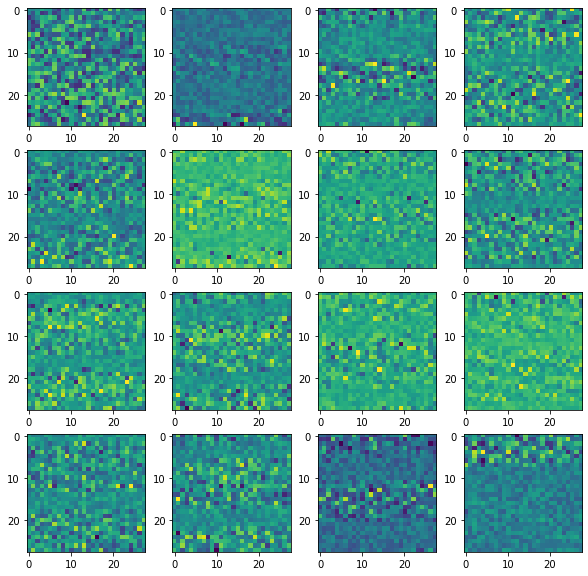

In [247]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

w1 = np.array(weights[0][0]).reshape(16,28,28)

fig, axs = plt.subplots(4, 4, figsize=(10,10))
for j in range(4):
    for k in range(4):
        i = j*4 + k
        axs[j,k].imshow(w1[i,:,:])

## Plot the weights of the second layer

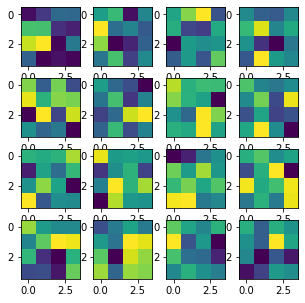

In [249]:
w2 = np.array(weights[1][0]).reshape(16,4,4)

fig, axs = plt.subplots(4, 4, figsize=(5,5))
for j in range(4):
    for k in range(4):
        i = j*4 + k
        axs[j,k].imshow(w2[i,:,:])

### Q3. (4 points)

Load the MNIST dataset again and train a convolutional neural network with 2 Conv2D layers. What do the weights look like now? How do they compare to those in Q2? What about the accuracy you achieve now? If it is higher, explain why you were able to achieve better accuracy? If it is the same or lower, explain why that is too.


Hint:

**We were able to achieve 99.25% test accuracy after 12 epochs.** 

You can use: MaxPooling2D, Dropout, Faltten and Dense layers

In [251]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Load and Preprocess Data:

In [258]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) 
x_test = x_test.reshape(10000, 28, 28, 1) 

x_train = x_train/255
x_test = x_test/255

x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')

# convert class vectors (one hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build the Model:

In [259]:
conv2d = Sequential()

conv2d.add(Conv2D(36, (3, 3), strides=(1, 1), activation="relu", input_shape = (28,28,1)))
conv2d.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
conv2d.add(Dropout(0.2))

conv2d.add(Conv2D(16, (3, 3), strides=(1, 1), activation="relu"))
conv2d.add(MaxPooling2D(pool_size=(2, 2)))
conv2d.add(Dropout(0.2))

conv2d.add(Flatten())

# add fully connected layers
conv2d.add(Dense(36, activation='relu'))
conv2d.add(Dense(16, activation='relu'))

# add output layer
conv2d.add(Dense(num_classes, activation='softmax'))

## Compile and Fit the Model:

In [260]:
batch_size = 128 
num_classes = 10 
epochs = 12 

In [261]:
conv2d.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])    

In [262]:
history = conv2d.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.9859 - accuracy: 0.6686 - val_loss: 0.2157 - val_accuracy: 0.9393
Epoch 2/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2413 - accuracy: 0.9259 - val_loss: 0.1285 - val_accuracy: 0.9603
Epoch 3/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1657 - accuracy: 0.9491 - val_loss: 0.0913 - val_accuracy: 0.9699
Epoch 4/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1367 - accuracy: 0.9575 - val_loss: 0.0729 - val_accuracy: 0.9766
Epoch 5/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1147 - accuracy: 0.9644 - val_loss: 0.0635 - val_accuracy: 0.9797
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1031 - accuracy: 0.9679 - val_loss: 0.0541 - val_accuracy: 0.9829
Epoch 7/12
60000/60000 [==============================] - 69s 1ms/st

In [ ]:
# With only 12 epochs, the accuracy of this model is increased by about 3% than the first model

## Extract the Weights:

In [263]:
weights = []

for layer in conv2d.layers:
    weights.append(layer.get_weights())

In [266]:
weights[0][0].reshape(36,3,3).shape

(36, 3, 3)

## Plot the Weights for the First Layer:

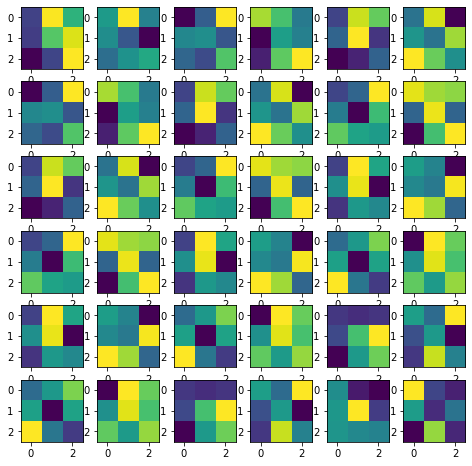

In [268]:
w1 = weights[0][0].reshape(36,3,3)

fig, axs = plt.subplots(6, 6, figsize=(8,8))
for j in range(6):
    for k in range(6):
        i = j*2 + k
        axs[j,k].imshow(w1[i,:,:])

## Plot the Weights for the Second Layer:

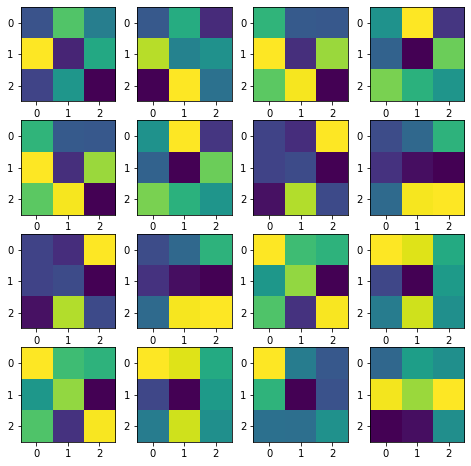

In [296]:
w2 = weights[3][0].reshape(36*16, 3,3)

fig, axs = plt.subplots(4, 4, figsize=(8,8))
for j in range(4):
    for k in range(4):
        i = j*2 + k
        axs[j,k].imshow(w2[i,:,:])

## Plot the output of the first layer:

In [222]:
from keras.models import Model

layer_outputs =[layer.output for layer in conv2d.layers]
activation_model = Model(inputs = conv2d.input, outputs = layer_outputs)
activations = activation_model.predict(x_train[10].reshape(1,28,28,1))

def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5, col_size*1.5))
    for row in range(0, row_size):
        for col in range(0, col_size):
            ax[row][col].imshow(activation[0,:,:, activation_index])
            activation_index += 1

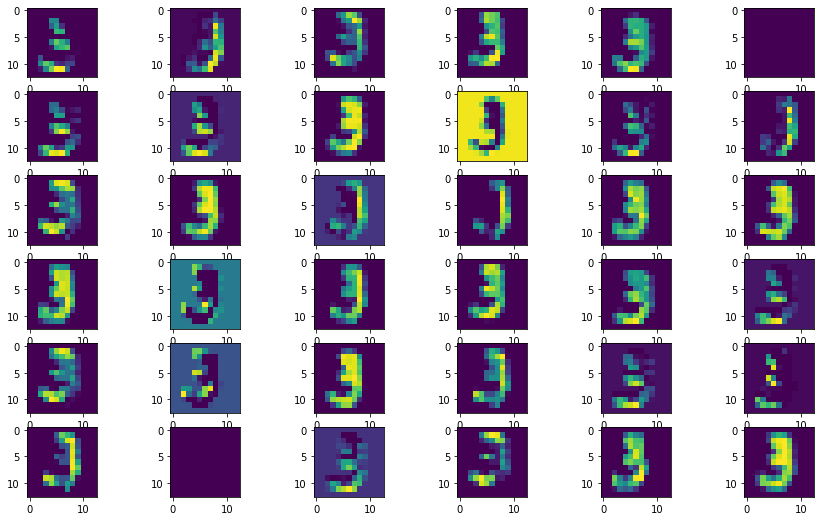

In [253]:
display_activation(activations, 6, 6, 1)

## Plot the output of the second layer:

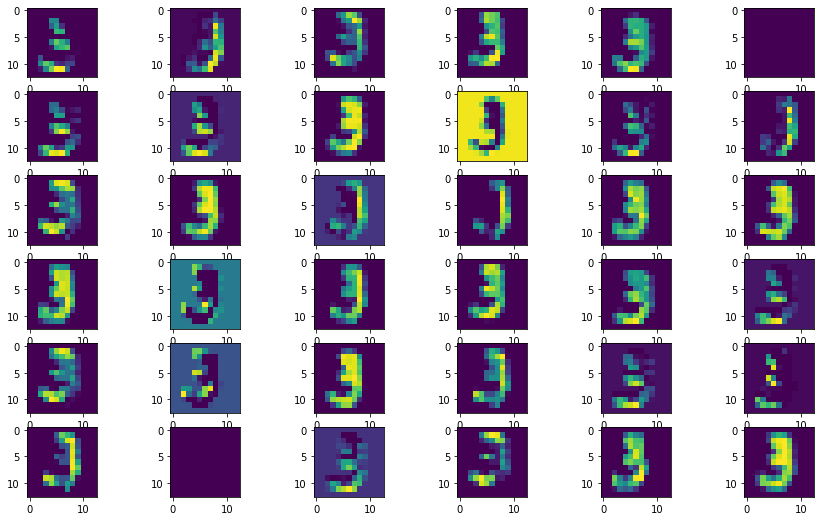

In [224]:
display_activation(activations, 6, 6, 2)